In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

In [3]:
rf = pd.read_csv("results/grn_rf_results.csv", header=0)
rf_adb = pd.read_csv("results/grn_rf_ada_results.csv", header=0)
rf_gb = pd.read_csv("results/grn_rf_gb_results.csv", header=0)

In [4]:
new_rows = []
for index, row in rf_adb.iterrows():
    new_row = row.copy()
    new_row['FI'] = 'SHAP'
    new_row['AUPRC'] = None
    new_row['AUROC'] = None
    new_row['MEAN_AUROC'] = None
    new_row['STD_AUROC'] = None
    new_row['MEAN_AUPRC'] = None
    new_row['STD_AUPRC'] = None
    new_row['p-value'] = None
    new_rows.append(row)
    new_rows.append(new_row)

rf_adb_new = pd.DataFrame(new_rows, columns=rf_adb.columns)

In [5]:
df_list = [rf, rf_adb_new, rf_gb]
results_all = pd.concat(df_list)

In [6]:
results_all.rename(columns={'p-value': 'pvalue'}, inplace=True)
results_all["Index"] =''
results_all.loc[(results_all["MAX_FEATURES"] == '100') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Vanilla" 
results_all.loc[(results_all["MAX_FEATURES"] == '100') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == True) , "Index"] = "Bootstrapping" 
results_all.loc[(results_all["MAX_FEATURES"] == 'sqrt') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Feature Bagging" 
results_all.loc[(results_all["MAX_FEATURES"] == 'sqrt') & (results_all["BOOSTING"] == "No") & (results_all["BOOTSTRAPPING"] == True) , "Index"] = "Feature Bagging \n& Bootstrapping" 
results_all.loc[(results_all["MAX_FEATURES"] == '100') & (results_all["BOOSTING"] == "Adaboostlinear") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Adaboost" 
results_all.loc[(results_all["MAX_FEATURES"] == 'sqrt') & (results_all["BOOSTING"] == "Adaboostlinear") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Adaboost \n& Feature Bagging" 
results_all.loc[(results_all["MAX_FEATURES"] == '100') & (results_all["BOOSTING"] == "GradientBoostingsquared_error") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Gradient Boosting" 
results_all.loc[(results_all["MAX_FEATURES"] == 'sqrt') & (results_all["BOOSTING"] == "GradientBoostingsquared_error") & (results_all["BOOTSTRAPPING"] == False) , "Index"] = "Gradient Boosting \n& Feature Bagging" 

results_all = results_all.reset_index(drop=True)
results_all = results_all.drop(results_all[results_all['Index'] == 'Vanilla'].index)
results_all.to_csv('./results/results_all_long.csv')

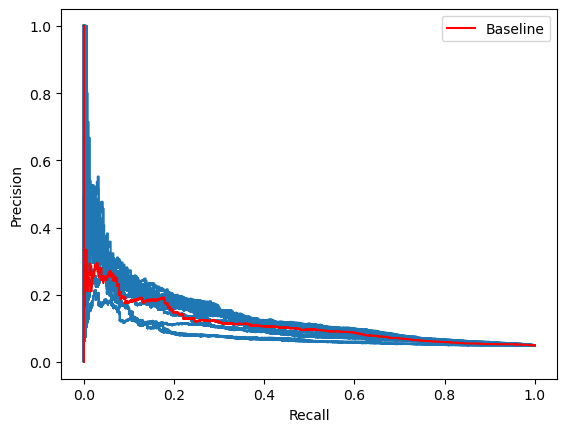

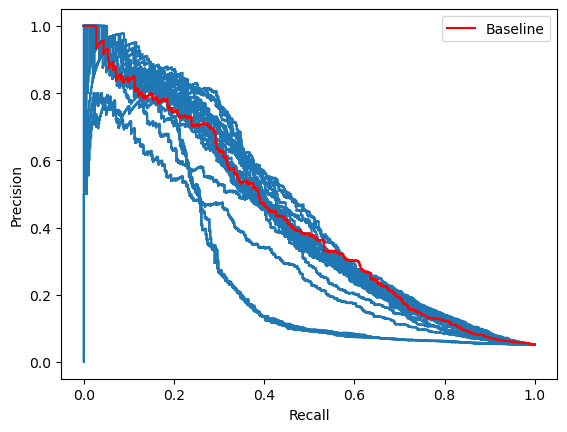

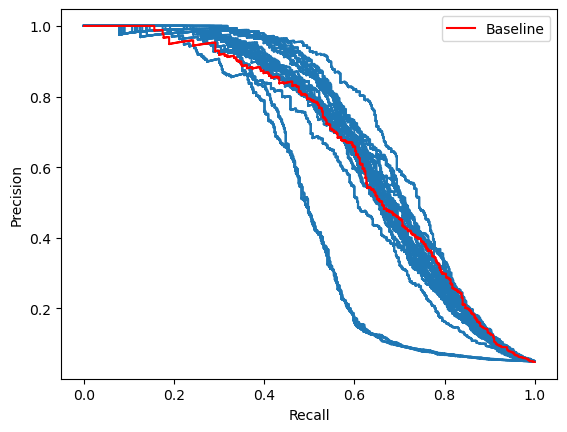

In [8]:
MR=[5,40,100]
for mr in MR:
    fig, ax = plt.subplots()
    for file in os.listdir("results/{}_mr_50_cond/".format(mr)):
        if file.startswith("grn_prc"):
            if file == 'grn_prc_baseline.csv':
                baseline = file
                continue
            prc = pd.read_csv("results/{}_mr_50_cond/".format(mr) + file, header=0)
            pr_display = PrecisionRecallDisplay(precision=prc["precision"], recall=prc["recall"]).plot(ax=ax, color='#1f77b4')
        
    prc = pd.read_csv("results/{}_mr_50_cond/".format(mr) + baseline, header=0)
    pr_display = PrecisionRecallDisplay(precision=prc["precision"], recall=prc["recall"]).plot(ax=ax, color='red' , label='Baseline')

    ax.legend()
    plt.savefig("results/{}_precision_recall_plot.png".format(mr))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

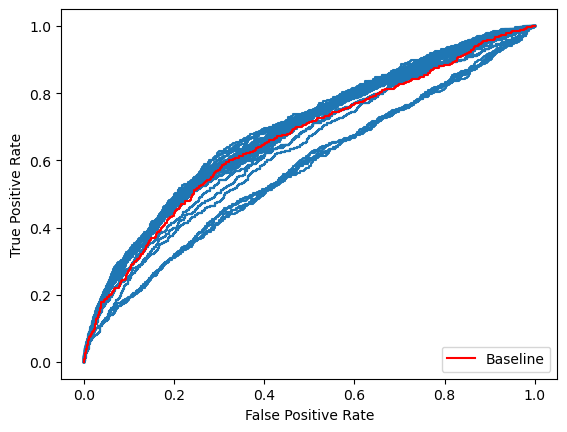

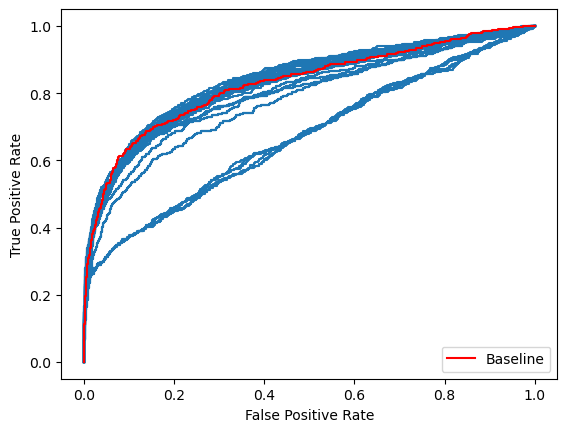

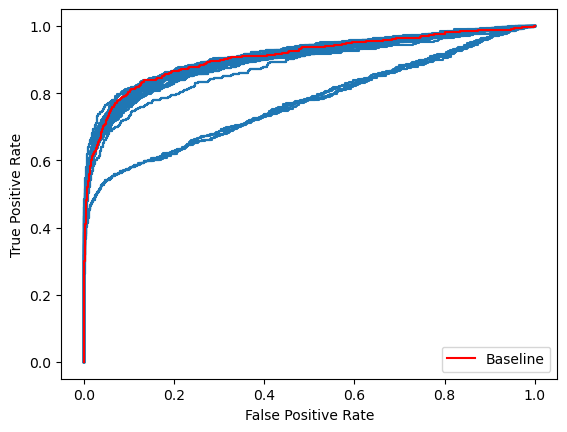

In [9]:
MR=[5,40,100]
for mr in MR:
    fig, ax = plt.subplots()
    for file in os.listdir("results/{}_mr_50_cond/".format(mr)):
        if file.startswith("grn_roc"):
            if file == 'grn_roc_baseline.csv':
                baseline = file
                continue
            roc = pd.read_csv("results/{}_mr_50_cond/".format(mr) + file, header=0)
            pr_display = RocCurveDisplay(fpr=roc["fpr"], tpr=roc["tpr"]).plot(ax=ax, color='#1f77b4')

    roc = pd.read_csv("results/{}_mr_50_cond/".format(mr) + baseline, header=0)
    pr_display = RocCurveDisplay(fpr=roc["fpr"], tpr=roc["tpr"]).plot(ax=ax, color='red', label='Baseline')
    plt.savefig("results/{}_roc_plot.png".format(mr))